# YELP DATASET CHALLENGE: INSIGHTS
## WORK IN PROGRESS

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Business Section -------------------------------------------------------------------------------

1) Which business categories are rated more striclty and why?

In [2]:
business_data = [json.loads(line) for line in open('Data Sets/yelp/business.json', "r",  encoding="utf8")]
print(len(business_data))

192609


In [3]:
keys = [k for k, v in business_data[0].items()]

In [4]:
keys.remove('address')
keys.remove('attributes')
keys.remove('hours')
keys.remove('is_open')
keys.remove('postal_code')
print(keys)

['business_id', 'name', 'city', 'state', 'latitude', 'longitude', 'stars', 'review_count', 'categories']


In [5]:
business_df = pd.DataFrame(columns = keys)

In [6]:
for i in range(0, 40001):
    business_df.loc[i, 'business_id'] = business_data[i]['business_id']
#    business_df.loc[i, 'address'] = business_data[i]['address']
    business_df.loc[i, 'name'] = business_data[i]['name']
    business_df.loc[i, 'city'] = business_data[i]['city']
    business_df.loc[i, 'state'] = business_data[i]['state']
#    business_df.loc[i, 'postal_code'] = business_data[i]['postal_code']
    business_df.loc[i, 'latitude'] = business_data[i]['latitude']
    business_df.loc[i, 'longitude'] = business_data[i]['longitude']
    business_df.loc[i, 'stars'] = business_data[i]['stars']
    business_df.loc[i, 'review_count'] = business_data[i]['review_count']
#    business_df.loc[i, 'is_open'] = business_data[i]['is_open']
#     business_df.loc[i, 'attributes'] = business_data[i]['attributes']
    business_df.loc[i, 'categories'] = business_data[i]['categories']
#     business_df.loc[i, 'hours'] = business_data[i]['hours']

In [7]:
business_df = business_df.dropna().reset_index()
business_df = business_df.drop(columns = ['index'])
business_df.stars = business_df.stars.astype('float')
business_df.review_count = business_df.review_count.astype('int')
business_df.latitude = business_df.latitude.astype('float')
business_df.longitude = business_df.longitude.astype('float')

In [8]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39917 entries, 0 to 39916
Data columns (total 9 columns):
business_id     39917 non-null object
name            39917 non-null object
city            39917 non-null object
state           39917 non-null object
latitude        39917 non-null float64
longitude       39917 non-null float64
stars           39917 non-null float64
review_count    39917 non-null int32
categories      39917 non-null object
dtypes: float64(3), int32(1), object(5)
memory usage: 2.6+ MB


In [9]:
# sns.set(style="ticks", palette="pastel")
# plt.figure(figsize = (15,8))
# sns.countplot(x = 'city', data = business_df, order=business_df.city.value_counts().iloc[:10].index)

In [10]:
# plt.figure(figsize = (15,8))
# sns.countplot(x = 'state', data = business_df, order=business_df.state.value_counts().iloc[:10].index)

In [12]:
# sns.set(style="ticks", palette="pastel")
# plt.figure(figsize = (15,8))
# sns.boxplot(x = 'stars', y = 'review_count', data = business_df)
# sns.despine(offset=10, trim=True)

In [13]:
# sns.set(style="ticks", palette="pastel")
# plt.figure(figsize = (15,8))
# plt.ylim(0,1000)
# sns.boxplot(x = 'stars', y = 'review_count', data = business_df)
# sns.despine(offset=10, trim=True)

In [14]:
# plt.figure(figsize = (15,8))
# plt.hist(x = business_df['stars'], align = 'mid')

In [15]:
business_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,categories
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,Phoenix,AZ,33.522143,-112.018481,3.0,5,"Golf, Active Life"
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,43.605499,-79.652289,2.5,128,"Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,Charlotte,NC,35.092564,-80.859132,4.0,170,"Sushi Bars, Restaurants, Japanese"
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,Goodyear,AZ,33.455613,-112.395596,5.0,3,"Insurance, Financial Services"
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,Charlotte,NC,35.190012,-80.887223,4.0,4,"Plumbing, Shopping, Local Services, Home Servi..."


In [16]:
business_df['categories'] = business_df['categories'].fillna('No Category')

In [22]:
business_df2 = business_df.copy(deep = True)

In [23]:
business_df2['categories'] = business_df2['categories'].apply(lambda x: x.split(', '))

In [24]:
category_list = []
for x in range(0,len(business_df2.categories)):
    for elem in business_df2.categories[x]:
        if elem not in category_list:
            category_list.append(elem)
        else:
            continue

In [25]:
for category in category_list:
    business_df2[category] = 0

In [26]:
for category in category_list:
    for x in range(0,len(business_df2)):
        if category in business_df2.loc[x, 'categories']:
            business_df2.loc[x, category] = 1

In [27]:
business_df2.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,categories,Golf,...,Public Adjusters,Pedicabs,Crane Services,Slovakian,Interlock Systems,Scooter Tours,Shaved Snow,Childbirth Education,Military Surplus,College Counseling
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,Phoenix,AZ,33.522143,-112.018481,3.0,5,"[Golf, Active Life]",1,...,0,0,0,0,0,0,0,0,0,0
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,43.605499,-79.652289,2.5,128,"[Specialty Food, Restaurants, Dim Sum, Importe...",0,...,0,0,0,0,0,0,0,0,0,0
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,Charlotte,NC,35.092564,-80.859132,4.0,170,"[Sushi Bars, Restaurants, Japanese]",0,...,0,0,0,0,0,0,0,0,0,0
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,Goodyear,AZ,33.455613,-112.395596,5.0,3,"[Insurance, Financial Services]",0,...,0,0,0,0,0,0,0,0,0,0
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,Charlotte,NC,35.190012,-80.887223,4.0,4,"[Plumbing, Shopping, Local Services, Home Serv...",0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# column_list = []
# for x in range(9,len(business_df2.columns)):
#     if np.sum(business_df2.iloc[:, x]) <= 10:
#         column_list.append(x)

In [29]:
# business_df2 = business_df2.drop(columns = business_df2.columns[column_list])

In [30]:
top_categories = ['business_id', 'name', 'city', 'state', 'latitude', 'longitude', 'stars', 'review_count', 'categories',
                  'Active Life', 'Arts & Entertainment', 'Automotive', 'Beauty & Spas', 'Bicycles', 'Education', 
                  'Event Planning & Services', 'Financial Services', 'Food', 'Health & Medical', 
                  'Home Services', 'Hotels & Travel', 'Local Flavor', 'Local Services', 'Mass Media', 
                  'Nightlife', 'Pets', 'Professional Services', 'Public Services & Government',
                  'Real Estate', 'Religious Organizations', 'Restaurants' , 'Shopping' ]

In [31]:
business_df3 = business_df2.copy(deep = True)

In [32]:
business_reduced_df = business_df3.loc[:, business_df3.columns.isin(top_categories)].copy(deep = True)

In [33]:
business_reduced_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,categories,Active Life,...,Arts & Entertainment,Automotive,Hotels & Travel,Real Estate,Public Services & Government,Education,Pets,Local Flavor,Mass Media,Religious Organizations
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,Phoenix,AZ,33.522143,-112.018481,3.0,5,"[Golf, Active Life]",1,...,0,0,0,0,0,0,0,0,0,0
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,43.605499,-79.652289,2.5,128,"[Specialty Food, Restaurants, Dim Sum, Importe...",0,...,0,0,0,0,0,0,0,0,0,0
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,Charlotte,NC,35.092564,-80.859132,4.0,170,"[Sushi Bars, Restaurants, Japanese]",0,...,0,0,0,0,0,0,0,0,0,0
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,Goodyear,AZ,33.455613,-112.395596,5.0,3,"[Insurance, Financial Services]",0,...,0,0,0,0,0,0,0,0,0,0
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,Charlotte,NC,35.190012,-80.887223,4.0,4,"[Plumbing, Shopping, Local Services, Home Serv...",0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
col_dict = {}
for x in range(9,len(business_reduced_df.columns)):
    col_sum = np.sum(business_reduced_df.iloc[:, x])
    cur_col = business_reduced_df.columns[x]
    col_dict.update({cur_col:col_sum})

In [35]:
print('Total entries in dataframe : {}.\n'.format(len(business_reduced_df)))
for key, value in col_dict.items():
    if value >= 1000:
        print('{} appears {} times.'.format(key, value))

Total entries in dataframe : 39917.

Active Life appears 2018 times.
Restaurants appears 12217 times.
Food appears 6180 times.
Shopping appears 6725 times.
Local Services appears 2954 times.
Home Services appears 4134 times.
Beauty & Spas appears 4003 times.
Professional Services appears 1265 times.
Nightlife appears 2676 times.
Event Planning & Services appears 2132 times.
Health & Medical appears 3612 times.
Arts & Entertainment appears 1302 times.
Automotive appears 2767 times.
Hotels & Travel appears 1246 times.
Real Estate appears 1214 times.


In [36]:
business_reduced_df['main_category'] = 'None'

In [37]:
for x in range(0, len(business_reduced_df)):
    for y in range(9, len(business_reduced_df.columns) - 1):
        if business_reduced_df.iloc[x, y] == 1:
            if business_reduced_df.loc[x, 'main_category'] == 'None':
                business_reduced_df.loc[x, 'main_category'] = business_reduced_df.columns[y]
            else:
                business_reduced_df.loc[x, 'main_category'] += ('/' + business_reduced_df.columns[y])

In [38]:
business_reduced_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,categories,Active Life,...,Automotive,Hotels & Travel,Real Estate,Public Services & Government,Education,Pets,Local Flavor,Mass Media,Religious Organizations,main_category
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,Phoenix,AZ,33.522143,-112.018481,3.0,5,"[Golf, Active Life]",1,...,0,0,0,0,0,0,0,0,0,Active Life
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,43.605499,-79.652289,2.5,128,"[Specialty Food, Restaurants, Dim Sum, Importe...",0,...,0,0,0,0,0,0,0,0,0,Restaurants/Food
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,Charlotte,NC,35.092564,-80.859132,4.0,170,"[Sushi Bars, Restaurants, Japanese]",0,...,0,0,0,0,0,0,0,0,0,Restaurants
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,Goodyear,AZ,33.455613,-112.395596,5.0,3,"[Insurance, Financial Services]",0,...,0,0,0,0,0,0,0,0,0,Financial Services
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,Charlotte,NC,35.190012,-80.887223,4.0,4,"[Plumbing, Shopping, Local Services, Home Serv...",0,...,0,0,0,0,0,0,0,0,0,Shopping/Local Services/Home Services


In [39]:
business_reduced_df['main_category'].nunique()

776

Text(0.5, 1.0, 'Main Business Categories')

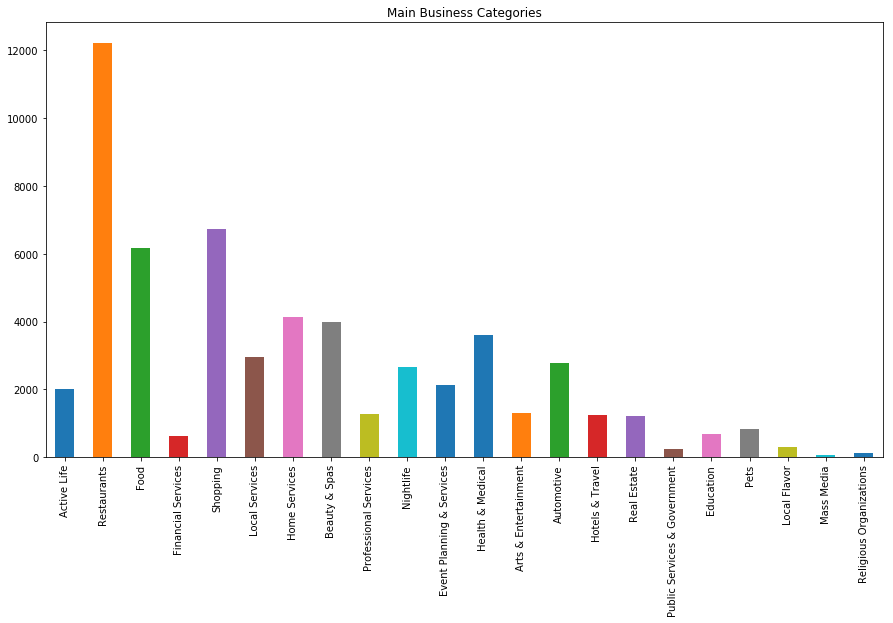

In [40]:
plt.figure(figsize = (15,8))
business_reduced_df.iloc[:,9:-1].sum().plot.bar()
plt.title('Main Business Categories')

In [41]:
big_categories = []
for category in business_reduced_df['main_category'].unique():
    if len(business_reduced_df[business_reduced_df['main_category'] == category]) >= 50:
        big_categories.append(category)

In [42]:
business_reduced_df2 = business_reduced_df[business_reduced_df['main_category'].isin(big_categories)].reset_index().copy(deep = True)

In [43]:
business_reduced_df2 = business_reduced_df2.drop(columns = ['index'])

In [44]:
ct2 = pd.crosstab(business_reduced_df2['main_category'], business_reduced_df2['stars'])

In [45]:
ct2

stars,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
main_category,,,,,,,,,
Active Life,5,10,17,62,86,120,187,203,272
Active Life/Arts & Entertainment,0,0,0,3,3,10,13,16,9
Active Life/Education,2,0,1,2,4,6,11,14,11
Active Life/Event Planning & Services,0,0,1,4,5,14,11,12,12
Active Life/Health & Medical,1,3,1,3,6,9,12,19,72
Active Life/Shopping,2,1,2,6,7,25,19,29,25
Arts & Entertainment,2,8,7,17,38,45,58,51,22
Automotive,75,59,155,206,236,317,321,263,414
Automotive/Hotels & Travel,3,8,11,13,16,11,18,3,7


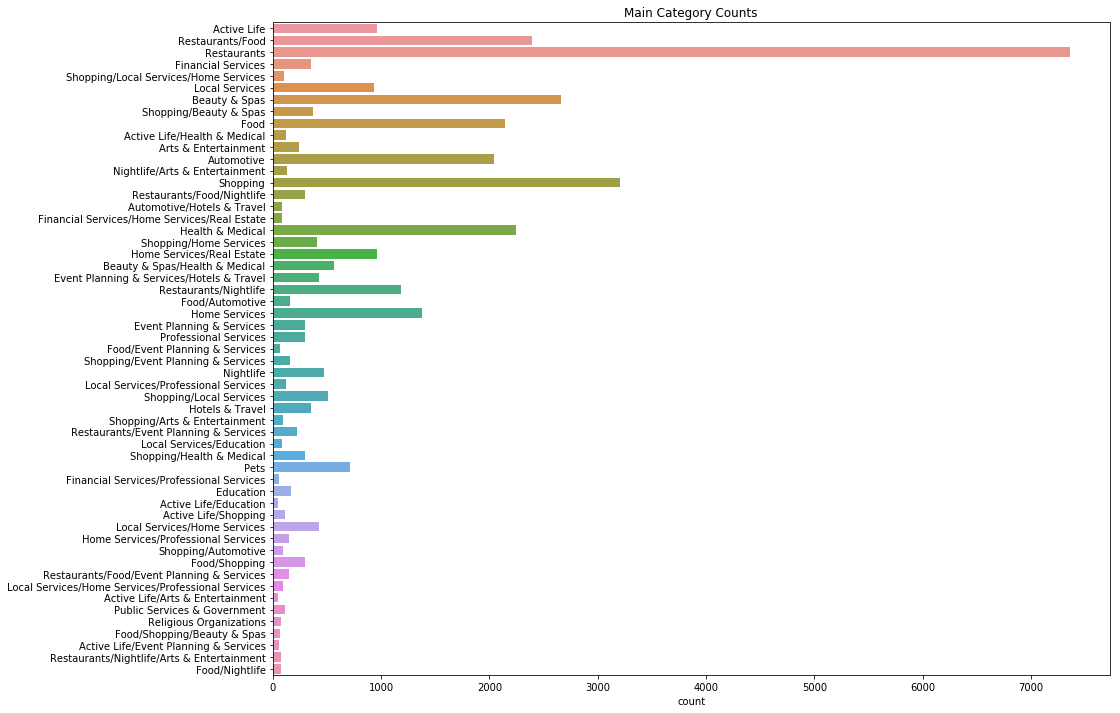

In [53]:
plt.figure(figsize = (15,12))
sns.countplot(data = business_reduced_df2, y = 'main_category')
plt.title('Main Category Counts')
plt.ylabel(None)
plt.show()

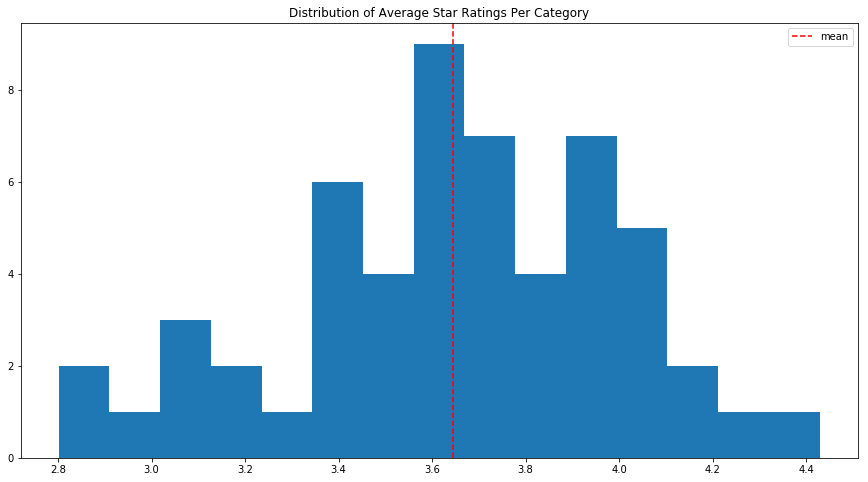

In [96]:
plt.figure(figsize = (15,8))
plt.hist(business_reduced_df2.groupby('main_category', as_index = False)['stars'].mean()['stars'], bins = 15)
plt.axvline(np.mean(business_reduced_df2.groupby('main_category', as_index = False)['stars'].mean()['stars']), linestyle = '--', color = 'red', label = 'mean')
plt.title('Distribution of Average Star Ratings Per Category')
plt.legend()
plt.show()

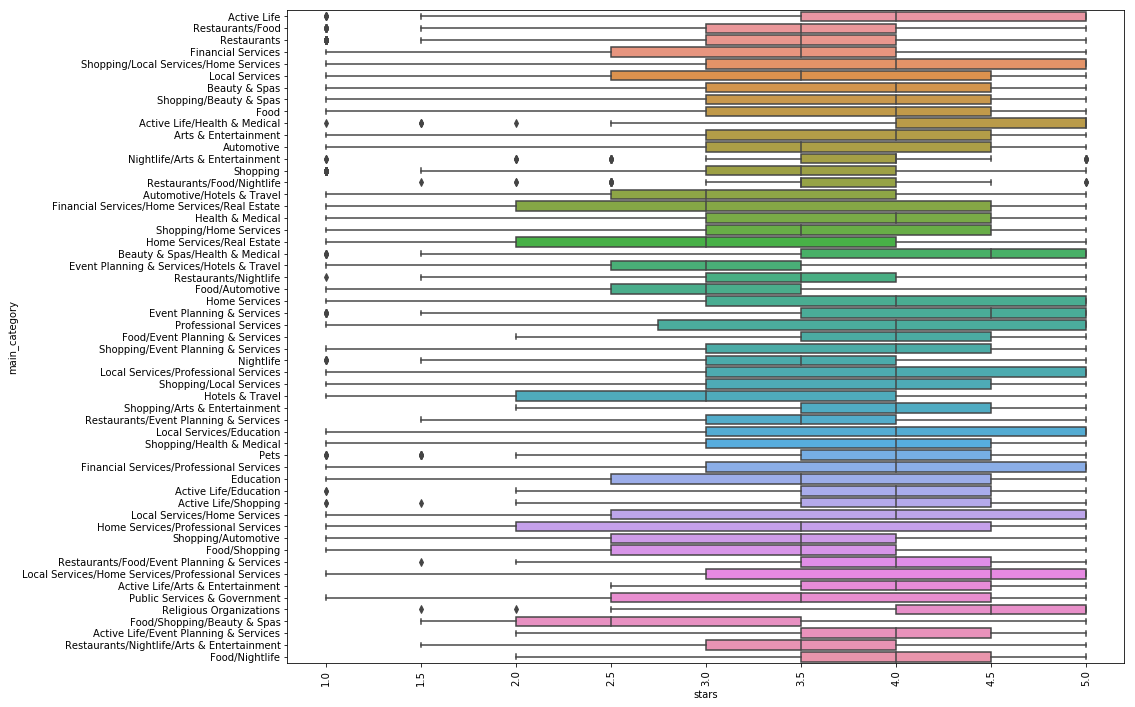

In [51]:
plt.figure(figsize = (15,12))
sns.boxplot(x = business_reduced_df2['stars'], y = business_reduced_df2['main_category'])
plt.xticks(rotation = 90)
plt.show()

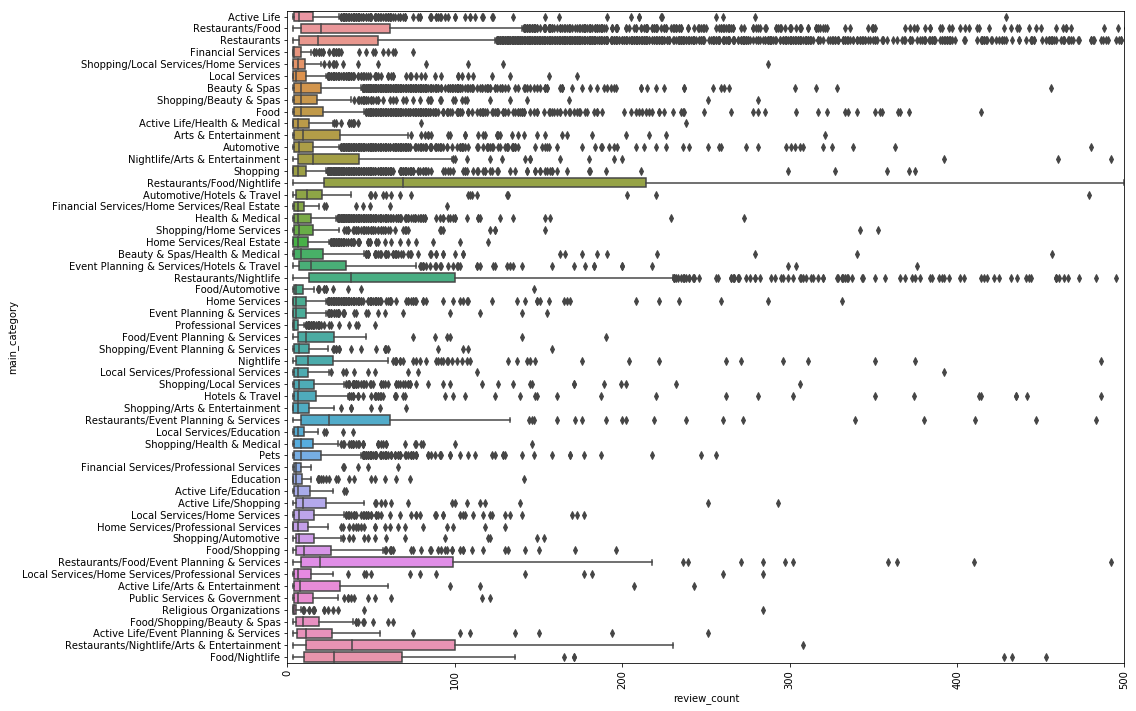

In [52]:
plt.figure(figsize = (15,12))
sns.boxplot(x = business_reduced_df2['review_count'], y = business_reduced_df2['main_category'])
plt.xticks(rotation = 90)
plt.xlim(0,500)
plt.show()

In [103]:
business_reduced_df2.to_csv('Data Sets/yelp/business_dataframe.csv')

# Reviews Section -------------------------------------------------------------------------------------

1) Is there a difference between the worst comments of a higly rated yelp restaurant and a low rated restaurant? Does the type of category or area matter?

2) Are there any highly rated restaurants that stick out from other highly rated restaurants? Why?

3) Are there any trends based on frequency of reviews for different users or eateries? EX: Does a user who rates once a month tend to only write reviews when places stink? What type of user does this?

4) What type of places tend to get reviews about service, staff, and ownership rather than taste?

In [55]:
reviews_data = [json.loads(line) for line in open('Data Sets/yelp/review.json', "r",  encoding="utf8")]
print(len(reviews_data))

6685900


In [56]:
keys = [k for k, v in reviews_data[0].items()]
print(keys)

['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']


In [102]:
reviews_df = pd.DataFrame(columns = keys)

In [103]:
for i in range(0, 5001):
    reviews_df.loc[i, 'review_id'] = reviews_data[i]['review_id']
    reviews_df.loc[i, 'user_id'] = reviews_data[i]['user_id']
    reviews_df.loc[i, 'business_id'] = reviews_data[i]['business_id']
    reviews_df.loc[i, 'stars'] = reviews_data[i]['stars']
    reviews_df.loc[i, 'useful'] = reviews_data[i]['useful']
    reviews_df.loc[i, 'funny'] = reviews_data[i]['funny']
    reviews_df.loc[i, 'cool'] = reviews_data[i]['cool']
    reviews_df.loc[i, 'text'] = reviews_data[i]['text']
    reviews_df.loc[i, 'date'] = reviews_data[i]['date']

In [104]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5001 entries, 0 to 5000
Data columns (total 9 columns):
review_id      5001 non-null object
user_id        5001 non-null object
business_id    5001 non-null object
stars          5001 non-null object
useful         5001 non-null object
funny          5001 non-null object
cool           5001 non-null object
text           5001 non-null object
date           5001 non-null object
dtypes: object(9)
memory usage: 550.7+ KB


In [105]:
reviews_df = reviews_df.dropna().reset_index()
reviews_df = reviews_df.drop(columns = ['index'])

In [106]:
#reviews_df = reviews_df.drop(columns = ['stars2'])

In [107]:
reviews_df.loc[:,'stars'] = reviews_df['stars'].astype('int')
reviews_df.loc[:,'useful'] = reviews_df['useful'].astype('int')
reviews_df.loc[:,'funny'] = reviews_df['funny'].astype('int')
reviews_df.loc[:,'cool'] = reviews_df['cool'].astype('int')

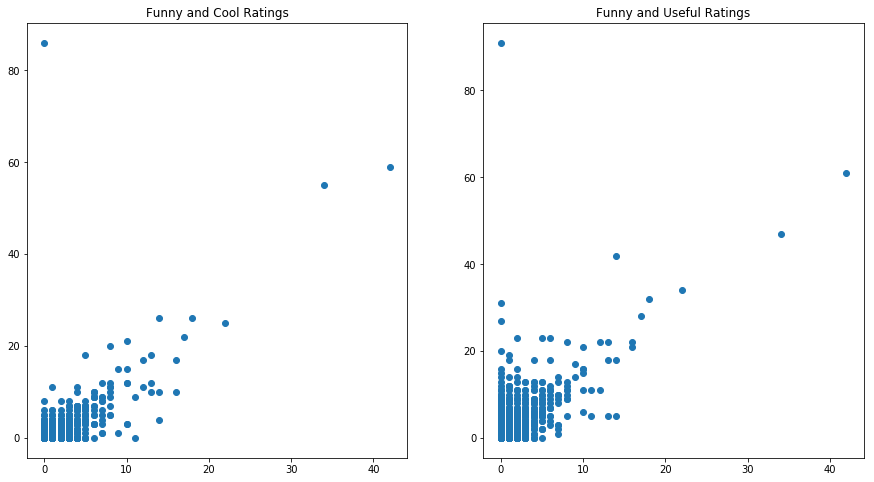

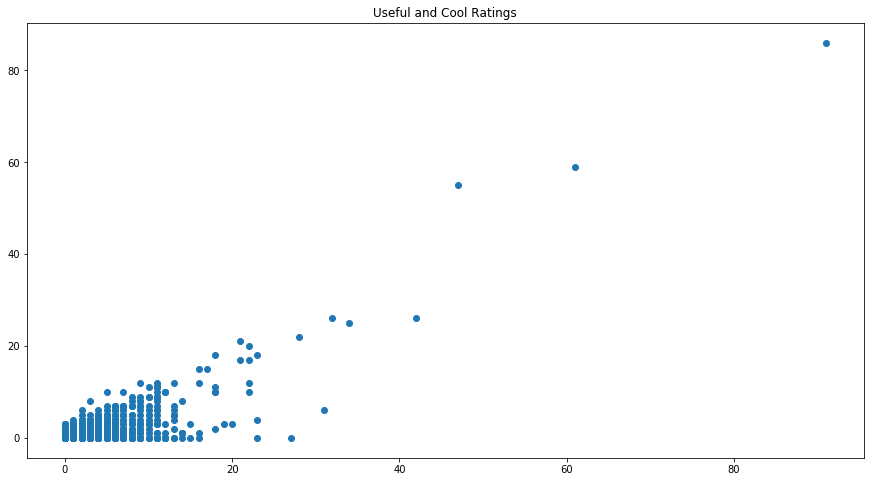

In [108]:
plt.figure(figsize = (15,8))
plt.subplot(1, 2, 1)
plt.scatter(reviews_df.funny, reviews_df.cool)
plt.title('Funny and Cool Ratings')
plt.subplot(1, 2, 2)
plt.scatter(reviews_df.funny, reviews_df.useful)
plt.title('Funny and Useful Ratings')
plt.show()

plt.figure(figsize = (15,8))
plt.scatter(reviews_df.useful, reviews_df.cool)
plt.title('Useful and Cool Ratings')
plt.show()

In [73]:
import spacy
import re
from fuzzywuzzy import fuzz
from collections import Counter
!python -m spacy download en


    Linking successful
    C:\Users\chase\AppData\Local\Programs\Python\Python37\lib\site-packages\en_core_web_sm
    -->
    C:\Users\chase\AppData\Local\Programs\Python\Python37\lib\site-packages\spacy\data\en

    You can now load the model via spacy.load('en')



You do not have sufficient privilege to perform this operation.


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [75]:
nlp = spacy.load('en_core_web_sm')

In [116]:
nlp_list = []
for x in range(0,len(reviews_df)):
    nlp_vers = nlp(reviews_df.loc[x, 'text'])
    nlp_list.append([token.lemma_ for token in nlp_vers
                             if (token.pos_ == 'ADJ' or
                              token.pos_ == 'NOUN' or 
                              token.pos_ == 'VERB') and
                             not token.is_punct
                             and not token.is_stop])

In [117]:
nlp_list[1]

['adore',
 'new',
 'be',
 'fan',
 'great',
 'blowout',
 'stranger',
 'chain',
 'offer',
 'service',
 'take',
 'flawless',
 'blowout',
 'new',
 'level',
 'greet',
 'green',
 'swoosh',
 'style',
 'black',
 'hair',
 'worthy',
 'rockstar',
 'outfit',
 'come',
 'relaxing',
 'incredible',
 'shampoo',
 'head',
 'message',
 'cure',
 'bad',
 'migraine',
 'minute',
 'scented',
 'shampoo',
 'room',
 'strong',
 'finger',
 'good',
 'way',
 'use',
 'perfect',
 'pressure',
 'superb',
 'start',
 'glorious',
 'blowout',
 'people',
 'involve',
 'good',
 'round',
 'brush',
 'action',
 'hair',
 'see',
 'team',
 'stylist',
 'get',
 'be',
 'evident',
 'way',
 'talk',
 'help',
 'be',
 'genuine',
 'corporate',
 'requirement',
 'fun',
 'start',
 'flat',
 'iron',
 'way',
 'flip',
 'wrist',
 'volume',
 'make',
 'look',
 'pagent',
 'girl',
 'admirable',
 'be',
 'worth',
 'note',
 'fry',
 'hair',
 'have',
 'happen',
 'skilled',
 'stylist',
 'end',
 'blowout',
 'style',
 'hair',
 'bouncey',
 'look',
 'terrific',
 '

In [119]:
reviews_df['processed_text'] = ''
for x in range(0,len(reviews_df)):
    doc_string = ''
    for elem in nlp_list[x]:
        doc_string = doc_string + ' ' + elem
    reviews_df.loc[x, 'processed_text'] = doc_string

In [121]:
reviews_df.loc[3,'processed_text']

' go lunch steak sandwich delicious salad delicious dressing perfect dressing distribute leaf know be go salad perfect drink price good friendly accommodate happy summation great pub experience would'

In [128]:
#Create tf-idf matrix from reviews
vectorizer = TfidfVectorizer(max_df=0.5, #Drop words that occur in more than half the paragraphs
#                              min_df=3, #Only use words that appear at least three times
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case 
                             use_idf=True,
                             norm=u'l2', #Applies a correction factor so that longer songs and shorter songs get treated equally
                             smooth_idf=True #Prevents divide-by-zero errors
                            )

reviews_tfidf=vectorizer.fit_transform(reviews_df['processed_text'])
print("Number of features: %d" % reviews_tfidf.get_shape()[1])

#Reshapes the vectorizer output into something people can read
reviews_tfidf_csr = reviews_tfidf.tocsr()

#Number of reviews
n = reviews_tfidf_csr.shape[0]
#A list of dictionaries, one per review
tfidf_by_review = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#For each review, lists the feature words and their tf-idf scores
for i, j in zip(*reviews_tfidf_csr.nonzero()):
    tfidf_by_review[i][terms[j]] = reviews_tfidf_csr[i, j]

Number of features: 11207


In [129]:
def word_topic(tfidf,solution, wordlist):
    # Loading scores for each word on each topic/component.
    words_by_topic=tfidf.T * solution
    # Linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    return components

# Extracts the top N words and their loadings for each topic.
def top_words(components, n_top_words):
    n_topics = range(components.shape[1])
    index= np.repeat(n_topics, n_top_words, axis=0)
    topwords=pd.Series(index=index)
    for column in range(components.shape[1]):
        # Sort the column so that highest loadings are at the top.
        sortedwords=components.iloc[:,column].sort_values(ascending=False)
        # Choose the N highest loadings.
        chosen=sortedwords[:n_top_words]
        # Combine loading and index into a string.
        chosenlist=chosen.index +" "+round(chosen,2).map(str) 
        topwords.loc[column]=chosenlist
    return(topwords)

In [130]:
ntopics = 5
nmf = NMF(alpha=0.0, 
          init='nndsvdar', # how starting value are calculated
          l1_ratio=0.0, # Sets whether regularization is L2 (0), L1 (1), or a combination (values between 0 and 1)
          max_iter=200, # when to stop even if the model is not converging (to prevent running forever)
          n_components=ntopics, 
          random_state=0, 
          solver='cd', # Use Coordinate Descent to solve
          tol=0.0001, # model will stop if tfidf-WH <= tol
          verbose=0 # amount of output to give while iterating
         )
reviews_nmf = nmf.fit_transform(reviews_tfidf) 

components_nmf = word_topic(reviews_tfidf, reviews_nmf, terms)

In [131]:
topic_titles = ['topic1', 'topic2', 'topic3', 'topic4', 'topic5']
topics_df = pd.DataFrame(reviews_nmf, columns = topic_titles)
topics_df.head(10)

,topic1,topic2,topic3,topic4,topic5
0,0.000000,0.022585,0.000000,0.000000,0.005963
1,0.004057,0.055404,0.009634,0.001110,0.011136
2,0.000000,0.053125,0.042079,0.000000,0.000000
3,0.049704,0.000000,0.049622,0.000000,0.012941
4,0.003865,0.114512,0.000000,0.000000,0.000000
5,0.079376,0.028472,0.000574,0.000000,0.051739
6,0.066209,0.048504,0.000595,0.000000,0.011889
7,0.003707,0.030370,0.024168,0.000000,0.070119
8,0.020498,0.074790,0.014960,0.004818,0.026385
9,0.001253,0.026539,0.012727,0.002939,0.007613


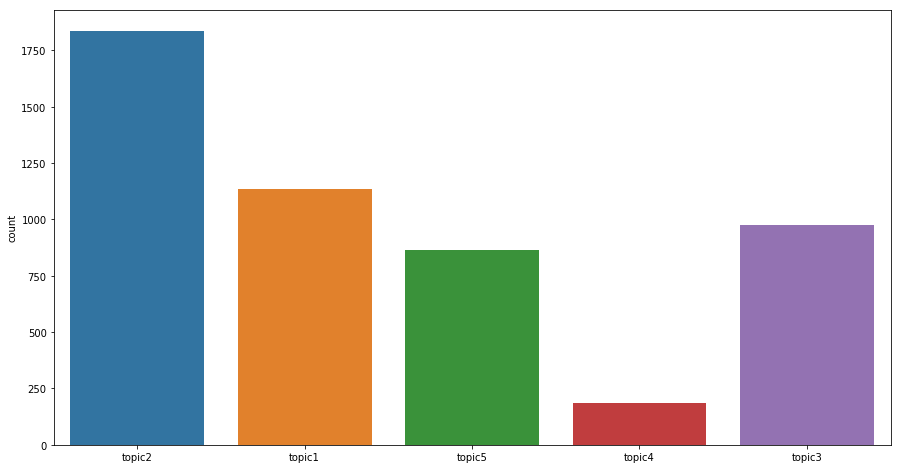

In [132]:
topics_viz = topics_df.idxmax(axis=1)
plt.figure(figsize = (15,8))
sns.countplot(list(topics_viz))
plt.show()

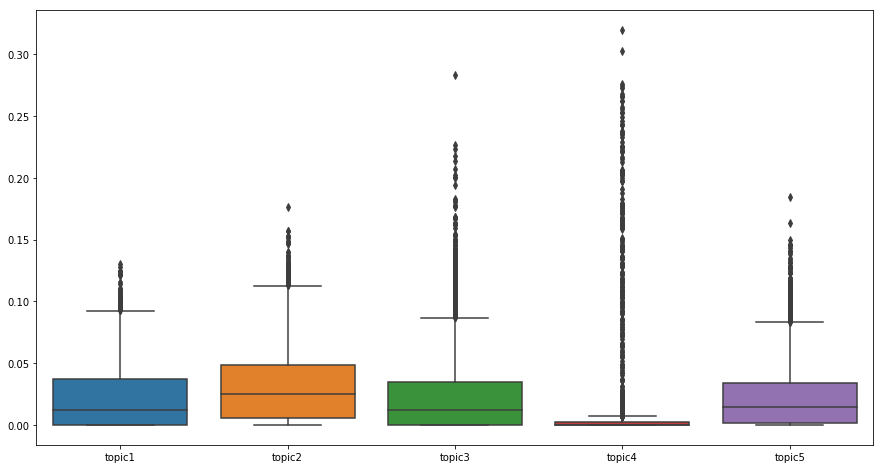

In [133]:
plt.figure(figsize = (15,8))
sns.boxplot(data = topics_df)
plt.show()

In [142]:
idx_list1 = list(topics_df[topics_df['topic1'] > 0.125].index)
idx_list2 = list(topics_df[topics_df['topic2'] > 0.155].index)
idx_list3 = list(topics_df[topics_df['topic3'] > 0.22].index)
idx_list4 = list(topics_df[topics_df['topic4'] > 0.27].index)
idx_list5 = list(topics_df[topics_df['topic5'] > 0.15].index)

In [143]:
print(idx_list1)
print(idx_list2)
print(idx_list3)
print(idx_list4)
print(idx_list5)

[3045, 4289]
[427, 446, 3692]
[2531, 3586, 4638]
[126, 442, 1792, 2275, 4972]
[337, 4427]


In [148]:
for x in idx_list1:
    print('Topic1 : \n {} \n'.format(reviews_df.loc[x, 'text']))
for x in idx_list2:
    print('Topic2 : \n {} \n'.format(reviews_df.loc[x, 'text']))
for x in idx_list3:
    print('Topic3 : \n {} \n'.format(reviews_df.loc[x, 'text']))
for x in idx_list4:
    print('Topic4 : \n {} \n'.format(reviews_df.loc[x, 'text']))
for x in idx_list5:
    print('Topic5 : \n {} \n'.format(reviews_df.loc[x, 'text']))

Topic1 : 
 *****5 stars out of 5*****
My cousin recommended to the Bird Bar.  I always like comfort food, especially fried chicken.  It was one of the best fried chicken I ever had.  We ordered the classic chicken and waffle and the pulled pork poutine.  The chicken and waffles comes with a watermelon mint feta salad which is very refreshing and complements very well with meal.  Our waitress, Ellen, was very polite and gave recommendations to our order.  Even though we didn't order any drinks, from time to time, she would come to the table and pour the water bottle when our glasses are half empty.  This is what I call attentive service.  Will definitely come back again and try the Mac and cheese! 

Topic1 : 
 It was a toss up between here and Shake Shack across the street. Once we found out this place is only in New York and Vegas, we decided we out to give it a try! 

I love that I'm not confused the minute I walk in. The menus clearly show you how to order, and the descriptions are f


Topic3 : 
 I have never been to an Olive Garden with such a great staff!  The food was good, but the staff made the experience great!!! 

Topic3 : 
 Great atmosphere and food the owner and staff are always very helpful and friendly.  I highly recommend this place for a great date night. 

Topic3 : 
 Great places. Love the people that work there. Dania, Kate and Brittany are all great and do a great job! 

Topic4 : 
 While the prices are a bit high for a make-your-own pizza, the taste makes up for it. I love going to Seventh Street market, sitting Not Just Coffee and having a drink while waiting for delicious fresh made pizza from Pure.  I've taken this to go as well as eaten inside the market, and I can say that the pizza doesn't do well reheated. So try to eat it fresh while there if possible.

If one of their specialty pizzas sounds good to you, go for it, as those are definitely a better deal for the amount of toppings you get for the money.  I wanted what I wanted, though, so I en

### TOPIC 1: Fried Chicken
### TOPIC 2: Bad Customer Service
### TOPIC 3: Good Customer Service
### TOPIC 4: Pizza
### TOPIC 5: Not Bad Not Great

# Users Section ----------------------------------------------------------------------------------------

In [149]:
user_data = [json.loads(line) for line in open('Data Sets/yelp/user.json', "r",  encoding="utf8")]
print(len(user_data))

1637138


In [150]:
keys = [k for k, v in user_data[0].items()]
print(keys)

['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny', 'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']


In [151]:
user_df = pd.DataFrame(columns = keys)

In [152]:
for i in range(0, 5001):
    user_df.loc[i, 'user_id'] = user_data[i]['user_id']
    user_df.loc[i, 'name'] = user_data[i]['name']
    user_df.loc[i, 'review_count'] = user_data[i]['review_count']
    user_df.loc[i, 'yelping_since'] = user_data[i]['yelping_since']
    user_df.loc[i, 'useful'] = user_data[i]['useful']
    user_df.loc[i, 'funny'] = user_data[i]['funny']
    user_df.loc[i, 'cool'] = user_data[i]['cool']
    user_df.loc[i, 'elite'] = user_data[i]['elite']
    user_df.loc[i, 'friends'] = user_data[i]['friends']
    user_df.loc[i, 'fans'] = user_data[i]['fans']
    user_df.loc[i, 'average_stars'] = user_data[i]['average_stars']
    user_df.loc[i, 'compliment_hot'] = user_data[i]['compliment_hot']
    user_df.loc[i, 'compliment_more'] = user_data[i]['compliment_more']
    user_df.loc[i, 'compliment_profile'] = user_data[i]['compliment_profile']
    user_df.loc[i, 'compliment_cute'] = user_data[i]['compliment_cute']
    user_df.loc[i, 'compliment_list'] = user_data[i]['compliment_list']
    user_df.loc[i, 'compliment_note'] = user_data[i]['compliment_note']
    user_df.loc[i, 'compliment_plain'] = user_data[i]['compliment_plain']
    user_df.loc[i, 'compliment_cool'] = user_data[i]['compliment_cool']
    user_df.loc[i, 'compliment_funny'] = user_data[i]['compliment_funny']
    user_df.loc[i, 'compliment_writer'] = user_data[i]['compliment_writer']
    user_df.loc[i, 'compliment_photos'] = user_data[i]['compliment_photos']

In [153]:
user_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,...,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,...,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,...,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,...,1,0,0,1,16,57,80,80,25,5


In [154]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5001 entries, 0 to 5000
Data columns (total 22 columns):
user_id               5001 non-null object
name                  5001 non-null object
review_count          5001 non-null object
yelping_since         5001 non-null object
useful                5001 non-null object
funny                 5001 non-null object
cool                  5001 non-null object
elite                 5001 non-null object
friends               5001 non-null object
fans                  5001 non-null object
average_stars         5001 non-null object
compliment_hot        5001 non-null object
compliment_more       5001 non-null object
compliment_profile    5001 non-null object
compliment_cute       5001 non-null object
compliment_list       5001 non-null object
compliment_note       5001 non-null object
compliment_plain      5001 non-null object
compliment_cool       5001 non-null object
compliment_funny      5001 non-null object
compliment_writer     5001 non-nu